# <font color=orange>**OpenCV ile Nesne Tespiti**</font>

## <font color=gold>**Havza Algoritmasi**</font> <font color=gray>**(Watershed)**</font>

**Havza,** segmentasyon icin yani bir goruntudeki farkli nesneleri ayirmak icin kullanilan klasik bir algoritmadir.

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

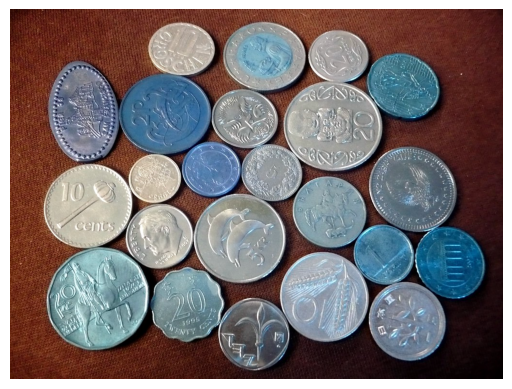

In [14]:
img = cv2.imread('coins.jpg')
plt.figure(), plt.imshow(img), plt.axis('off');

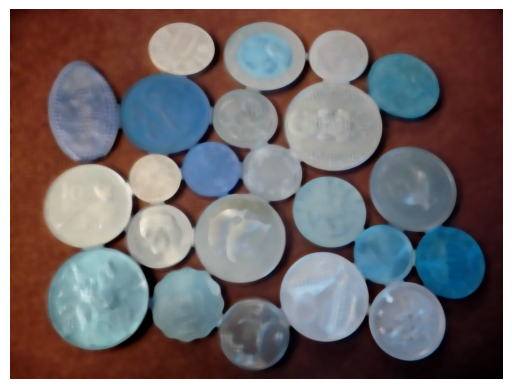

In [15]:
# Goruntudeki detaylardan kurtulmak gerekli. Cunku kenarlar yeterli:
# lpf: blurring
coin_blur = cv2.medianBlur(img, 13)
plt.figure(), plt.imshow(coin_blur), plt.axis('off');

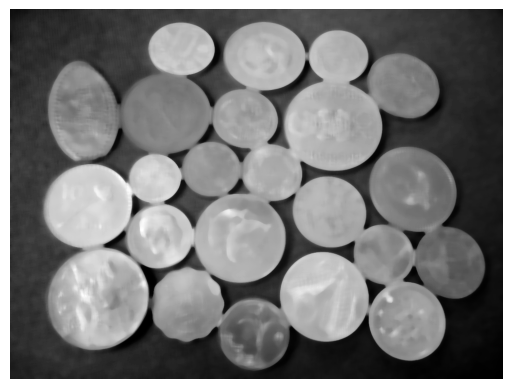

In [16]:
# grayscale

coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray, cmap='gray'), plt.axis('off');

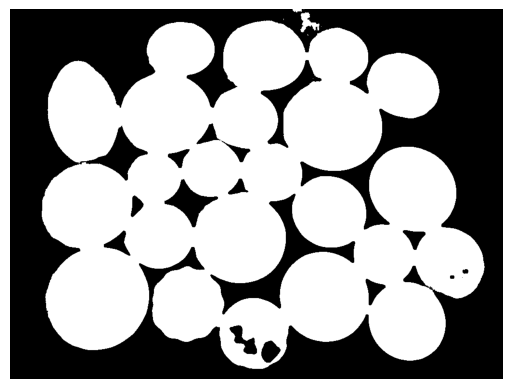

In [17]:
# Binary threshold:
# Arka planla diger ogeler arasindaki farki acacagiz:

ret, coin_thresh = cv2.threshold(coin_gray, 75, 255, cv2.THRESH_BINARY)
plt.figure(), plt.imshow(coin_thresh, cmap='gray'), plt.axis('off');

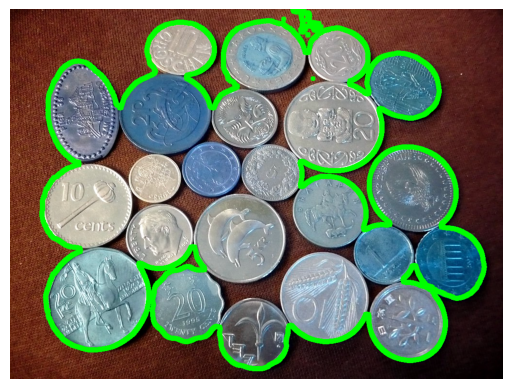

In [18]:
# Kontur Asamasi: 

contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

#contour lari cizdirme:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours,i,(0,255,0),10)
plt.figure(), plt.imshow(img), plt.axis('off');

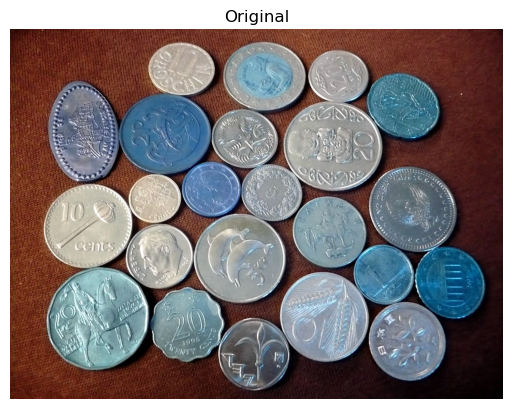

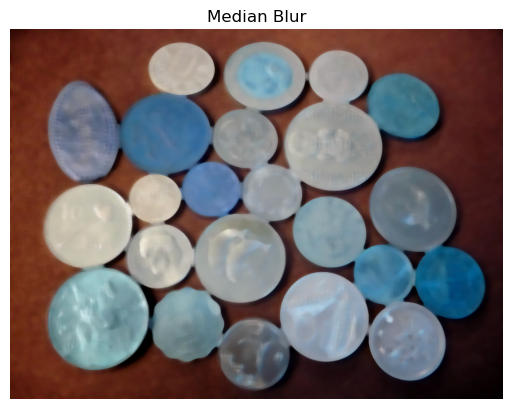

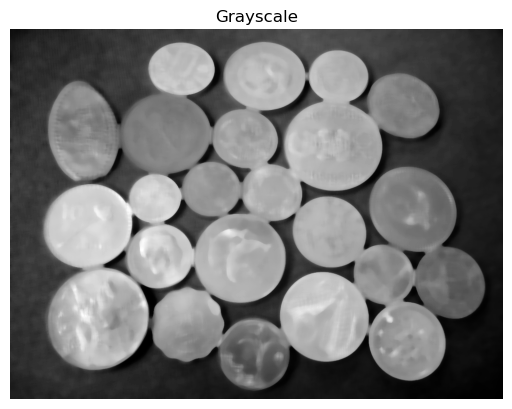

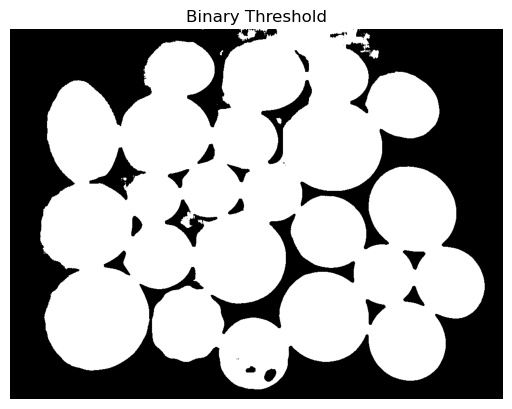

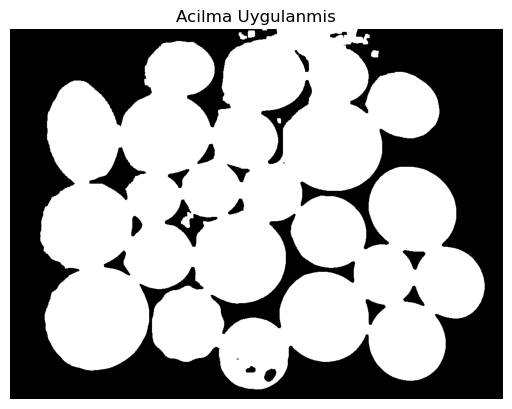

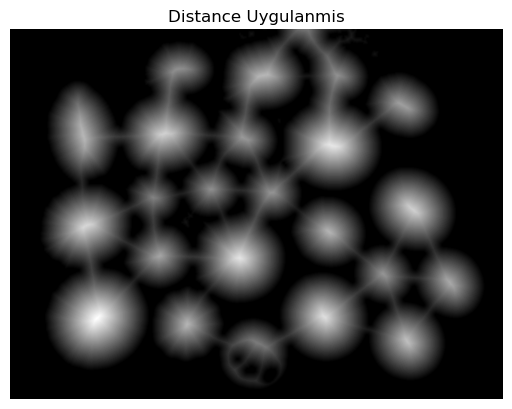

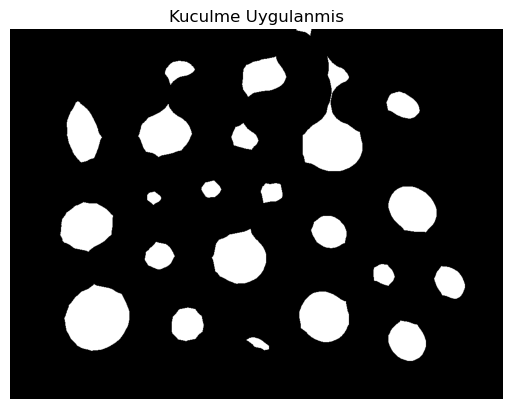

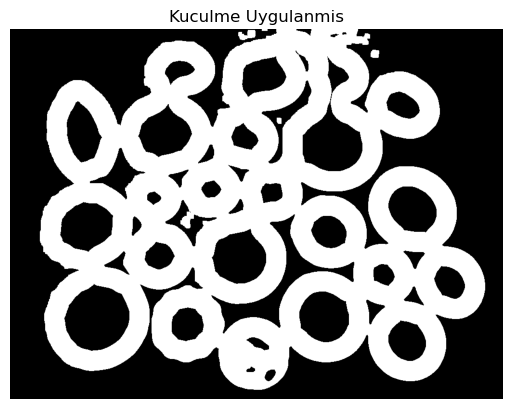

In [29]:
# Watershed
img = cv2.imread('coins.jpg')
plt.figure(), plt.imshow(img), plt.axis('off'), plt.title('Original')

# lpf: blurring
coin_blur = cv2.medianBlur(img, 13)
plt.figure(), plt.imshow(coin_blur), plt.axis('off'), plt.title('Median Blur')

# grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray, cmap='gray'), plt.axis('off'), plt.title('Grayscale')

# Binary threshold:

ret, coin_thresh = cv2.threshold(coin_gray, 65, 255, cv2.THRESH_BINARY)
plt.figure(), plt.imshow(coin_thresh, cmap='gray'), plt.axis('off'), plt.title('Binary Threshold')

# Acilma: erozyon & genisleme
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(coin_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.figure(), plt.imshow(opening, cmap='gray'), plt.axis('off'), plt.title('Acilma Uygulanmis')

# aralardaki kopruleri kaldirmak icin distance kullanilir:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.figure(), plt.imshow(dist_transform, cmap='gray'), plt.axis('off'), plt.title('Distance Uygulanmis')

# Ondeki resim ile arkadaki resim arasinda ayristirma uygulanir.
# Resmi Kucultme:
ret, sure_foreground = cv2.threshold(dist_transform, 0.4*np.max(dist_transform),255,0)
plt.figure(), plt.imshow(sure_foreground, cmap='gray'), plt.axis('off'), plt.title('Kuculme Uygulanmis')

# Arka plani bulmak icin resmi buyutelim:
sure_background = cv2.dilate(opening, kernel, iterations = 1)
sure_foreground = np.uint8(sure_foreground)
unknown = cv2.subtract(sure_background,sure_foreground)
plt.figure(), plt.imshow(unknown, cmap='gray'), plt.axis('off'), plt.title('Kuculme Uygulanmis');

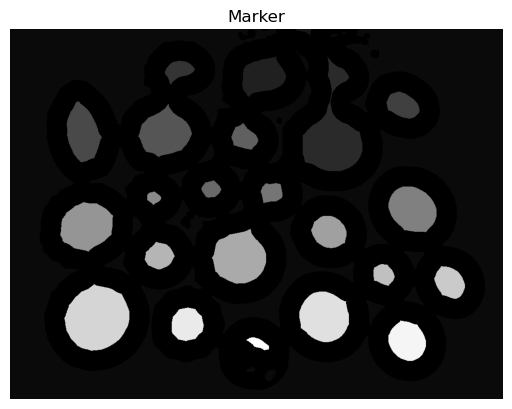

In [31]:
# Baglanti 
ret, marker = cv2.connectedComponents(sure_foreground)
marker += 1
marker[unknown == 255] = 0
plt.figure(), plt.imshow(marker, cmap='gray'), plt.axis('off'), plt.title('Marker');

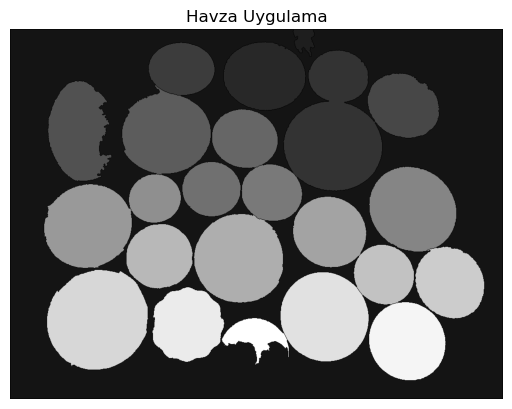

In [33]:
# Havza 

marker = cv2.watershed(img,marker)
plt.figure(), plt.imshow(marker, cmap='gray'), plt.axis('off'), plt.title('Havza Uygulama');

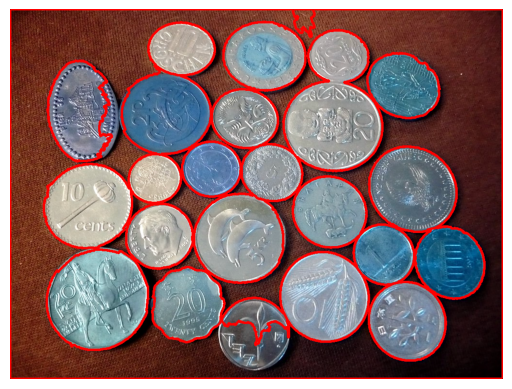

In [34]:
# Kontur Asamasi: 

contours, hierarchy = cv2.findContours(marker.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

#contour lari cizdirme:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours,i,(255,0,0),2)
plt.figure(), plt.imshow(img), plt.axis('off');